In [1]:
from protrend.model import *

entities = {
    'effector': Effector,
    'evidence': Evidence,
    'gene': Gene,
    'motif': Motif,
    'operon': Operon,
    'organism': Organism,
    'pathway': Pathway,
    'publication': Publication,
    'regulator': Regulator,
    'regulatory family': RegulatoryFamily,
    'regulatory interaction': RegulatoryInteraction,
    'tfbs': TFBS,
}

In [2]:
from protrend.utils import NeoDatabase, Settings

neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

In [3]:
from collections import defaultdict
import pandas as pd

data = defaultdict(lambda: [0])

for name, node in entities.items():
    if name in ('regulatory interaction', 'gene', 'tfbs', 'operon', 'regulator', 'motif', 'organism'):
        data[name] = [len(node.nodes)]

    else:
        data['other'] = [len(node.nodes) + data['other'][0]]

df = pd.DataFrame(data)
df = df.transpose()
df.columns = ['count']
df = df.sort_values(by='count', ascending=False)
df

,count
regulatory interaction,195583
gene,99517
tfbs,73950
operon,22905
regulator,12301
motif,11966
other,3108
organism,526


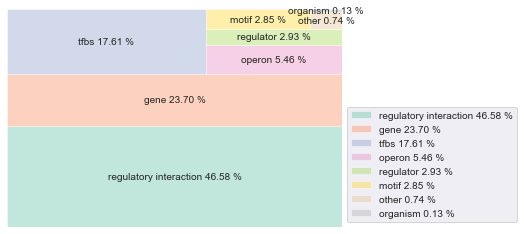

In [4]:
#libraries
import matplotlib.pyplot as plt
import squarify

sizes = list(df['count'])
total = sum(sizes)
labels = [f'{name} {count / total * 100:.2f} %' for name, count in zip(df.index, sizes)]

ax = squarify.plot(sizes=sizes, label=labels, norm_x=50, norm_y=150, color=plt.cm.Set2.colors, alpha=.4)
ax.get_xaxis().set_visible(False)
plt.axis('off')
plt.legend(handles=ax.containers[0], labels=labels, loc='lower left', bbox_to_anchor=(1,0), ncol=1)
plt.savefig("entity_report.png", bbox_inches="tight", dpi=150)
plt.show()